**Regresión Lineal Múltiple**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import joblib

np.set_printoptions(precision=4)

In [2]:
#Datos
df = pd.read_csv('Empresas.csv')
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


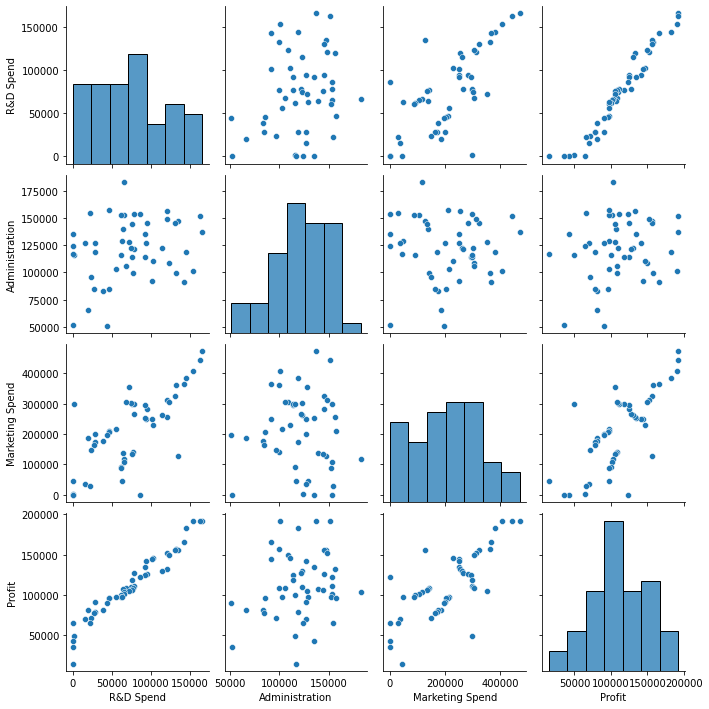

In [ ]:
#Pre-Visualización
sns.pairplot(df)
plt.show()

In [3]:
#Codificación Var. Cat.
df = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False), [3])],
                        remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas').fit_transform(df)
df.head(5)

,State_California,State_Florida,State_New York,R&D Spend,Administration,Marketing Spend,Profit
0,0.0,0.0,1.0,165349.20,136897.80,471784.10,192261.83
1,1.0,0.0,0.0,162597.70,151377.59,443898.53,191792.06
2,0.0,1.0,0.0,153441.51,101145.55,407934.54,191050.39
3,0.0,0.0,1.0,144372.41,118671.85,383199.62,182901.99
4,0.0,1.0,0.0,142107.34,91391.77,366168.42,166187.94


**Modelo 1:**

In [26]:
#Datos Entrenamiento-Prueba
x = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [27]:
x_test

array([[ 66051.52, 182645.56, 118148.2 ],
       [100671.96,  91790.61, 249744.55],
       [101913.08, 110594.11, 229160.95],
       [ 27892.92,  84710.77, 164470.71],
       [153441.51, 101145.55, 407934.54],
       [ 72107.6 , 127864.55, 353183.81],
       [ 20229.59,  65947.93, 185265.1 ],
       [ 61136.38, 152701.92,  88218.23],
       [ 73994.56, 122782.75, 303319.26],
       [142107.34,  91391.77, 366168.42]])

In [28]:
#Modelo
model_1 = LinearRegression()
model_1.fit(x_train, y_train)

LinearRegression()

In [29]:
#Parámetros del Modelo
print(f'  Intercepto: {model_1.intercept_}')
print(f'Coeficientes: {model_1.coef_}')

  Intercepto: 42989.00816508669
Coeficientes: [0.7788 0.0294 0.0347]


In [30]:
#Predicción vs Prueba
y_pred = model_1.predict(x_test)
print(np.concatenate((y_pred.reshape(-1,1), y_test.reshape(-1,1)),1))
print(f'Puntaje: {model_1.score(x_test,y_test):0.4f}')

[[103901.897  103282.38  ]
 [132763.0599 144259.4   ]
 [133567.9037 146121.95  ]
 [ 72911.7898  77798.83  ]
 [179627.9257 191050.39  ]
 [115166.6486 105008.31  ]
 [ 67113.5769  81229.06  ]
 [ 98154.8069  97483.56  ]
 [114756.1156 110352.25  ]
 [169064.0141 166187.94  ]]
Puntaje: 0.9394


**Modelo 2:**

In [11]:
#Datos Entrenamiento-Prueba
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [ ]:
#Modelo
model_2 = LinearRegression()
model_2.fit(x_train, y_train)

LinearRegression()

In [ ]:
#Parámetros del Modelo
print(f'  Intercepto: {model_2.intercept_}')
print(f'Coeficientes: {model_2.coef_}')

  Intercepto: 42554.167617767
Coeficientes: [-9.5928e+02  6.9937e+02  7.7347e-01  3.2885e-02  3.6610e-02]


In [ ]:
#Predicción vs Prueba
y_pred = model_2.predict(x_test)
print(np.concatenate((y_pred.reshape(-1,1), y_test.reshape(-1,1)),1))
print(f'Puntaje: {model_2.score(x_test,y_test):0.4f}')

[[103015.2016 103282.38  ]
 [132582.2776 144259.4   ]
 [132447.7385 146121.95  ]
 [ 71976.0985  77798.83  ]
 [178537.4822 191050.39  ]
 [116161.2423 105008.31  ]
 [ 67851.6921  81229.06  ]
 [ 98791.7337  97483.56  ]
 [113969.4353 110352.25  ]
 [167921.0657 166187.94  ]]
Puntaje: 0.9347


**Modelo 3:**

In [13]:
#Datos Entrenamiento-Prueba
x = df.iloc[:, [0,1,2,3,5]].values
y = df.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [ ]:
#Modelo
model_3 = LinearRegression()
model_3.fit(x_train, y_train)

LinearRegression()

In [ ]:
#Parámetros del Modelo
print(f'  Intercepto: {model_3.intercept_}')
print(f'Coeficientes: {model_3.coef_}')

  Intercepto: 46238.45656990662
Coeficientes: [ 9.0604e+01 -7.3586e+02  6.4526e+02  7.8514e-01  3.3956e-02]


In [ ]:
#Predicción vs Prueba
y_pred = model_3.predict(x_test)
print(np.concatenate((y_pred.reshape(-1,1), y_test.reshape(-1,1)),1))
print(f'Puntaje: {model_3.score(x_test,y_test):0.4f}')

[[101374.2837 103282.38  ]
 [133851.2422 144259.4   ]
 [133300.2841 146121.95  ]
 [ 72987.3207  77798.83  ]
 [179827.9121 191050.39  ]
 [115491.254  105008.31  ]
 [ 69057.7488  81229.06  ]
 [ 97880.0136  97483.56  ]
 [113898.4388 110352.25  ]
 [169510.7552 166187.94  ]]
Puntaje: 0.9447


**Modelo 4:**

In [ ]:
#Datos Entrenamiento-Prueba
np.random.seed(0)
x0 = np.linspace(-1,1,100)
x1 = x0 + np.random.normal(0,1,100)
x2 = x1 + 0.0*np.random.normal(0,1,100)
x = np.concatenate((x1.reshape(-1,1),x2.reshape(-1,1)),1)
y = 1/2 + 2*x1 + 10*x2 + np.random.normal(0,1,100)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [ ]:
A = x.T @ x
np.linalg.det(A)

0.0

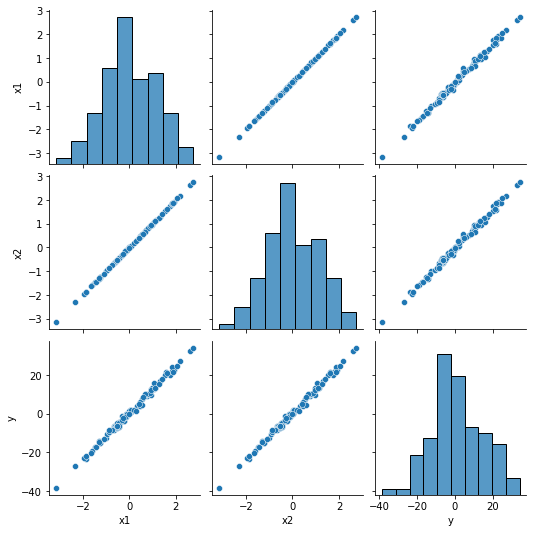

In [ ]:
#Pre-Visualización
df1 = pd.DataFrame(np.concatenate((x,y.reshape(-1,1)),1), columns=['x1','x2','y'])
sns.pairplot(df1)
plt.show()

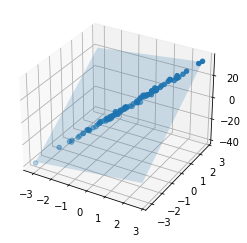

In [ ]:
x1_ = np.linspace(min(x1),max(x1),100)
x2_ = np.linspace(min(x2),max(x2),100)
xx1, xx2 = np.meshgrid(x1_, x2_)
yy = 1/2 + 2*xx1 + 10*xx2

ax = plt.axes(projection='3d')
ax.plot_surface(xx1, xx2, yy, alpha=0.2)
ax.scatter3D(x1, x2, y)

plt.show()

In [ ]:
#Modelo
model_4 = LinearRegression()
model_4.fit(x_train, y_train)

LinearRegression()

In [ ]:
#Parámetros del Modelo
print(f'  Intercepto: {model_4.intercept_}')
print(f'Coeficientes: {model_4.coef_}')

  Intercepto: 0.36069995089750023
Coeficientes: [5.9216 5.9216]


In [ ]:
#Predicción vs Prueba
y_pred = model_4.predict(x_test)
print(np.concatenate((y_pred.reshape(-1,1), y_test.reshape(-1,1)),1))
print(f'Puntaje: {model_4.score(x_test,y_test):0.4f}')

[[ -4.76  -4.49]
 [ 23.72  22.45]
 [  0.68   1.83]
 [  7.     7.67]
 [ -1.61  -1.93]
 [ 22.98  21.71]
 [ 10.37  10.29]
 [ -8.78  -8.23]
 [  1.21   1.94]
 [ 20.19  21.15]
 [-13.03 -13.14]
 [ 13.4   15.61]
 [  3.66   1.64]
 [ -7.03  -7.35]
 [-11.82 -12.36]
 [ -2.45  -3.79]
 [  4.2    3.74]
 [ 21.76  20.01]
 [-27.65 -26.85]
 [-10.99 -10.52]]
Puntaje: 0.9937


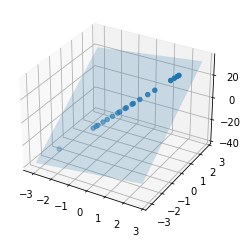

In [ ]:
x1_ = np.linspace(min(x1),max(x1),100)
x2_ = np.linspace(min(x2),max(x2),100)
xx1, xx2 = np.meshgrid(x1_, x2_)
yy = 1/2 + 2*xx1 + 10*xx2

ax = plt.axes(projection='3d')
ax.plot_surface(xx1, xx2, yy, alpha=0.2)
ax.scatter3D(x_test[:,0], x_test[:,1], y_pred)

plt.show()

**Modelo 5:**

In [ ]:
#Datos Entrenamiento-Prueba
np.random.seed(0)
x0 = np.linspace(-1,1,100)
x1 = x0 + np.random.normal(0,1,100)
x2 = x1 + 0.5*np.random.normal(0,1,100)
x3 = 5*np.linspace(-1,1,100)**2 + np.random.normal(0,1,100)
x = np.concatenate((x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1)),1)
y = 1/2 + 2*x1 + 10*x2 + np.random.normal(0,1,100)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [ ]:
#Modelo
model_5 = LinearRegression()
model_5.fit(x_train, y_train)

LinearRegression()

In [ ]:
#Parámetros del Modelo
print(f'  Intercepto: {model_5.intercept_}')
print(f'Coeficientes: {model_5.coef_}')

  Intercepto: 0.22711703989719778
Coeficientes: [1.9529 9.9945 0.087 ]


In [ ]:
#Predicción vs Prueba
y_pred = model_5.predict(x_test)
print(np.concatenate((y_pred.reshape(-1,1), y_test.reshape(-1,1)),1))
print(f'Puntaje: {model_5.score(x_test,y_test):0.4f}')

[[ -6.9611  -6.9813]
 [ 17.7468  16.9864]
 [ -5.397   -5.7409]
 [  3.4223   3.1347]
 [  1.6876   2.3659]
 [ 16.801   15.3082]
 [ 14.9232  15.0018]
 [-11.9752 -12.1255]
 [  0.5483   0.1082]
 [ 19.2598  18.39  ]
 [-17.1891 -17.6407]
 [ 13.298   12.7525]
 [  1.0748   1.1859]
 [  2.6121   1.9313]
 [-15.3179 -16.7033]
 [ -6.532   -5.4703]
 [  5.5017   5.9723]
 [ 17.7005  16.925 ]
 [-27.1771 -28.2943]
 [ -1.0831  -0.4907]]
Puntaje: 0.9966
